In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


#Classification
iris = sn.load_dataset("iris")


#Regression
flights = sn.load_dataset("flights")

# Classification

We are gonna start with one of the common alogirthm in data mining: **KNN**. This algorithm label the new data point upon the k nearest neighbors of that new point. One of the hyperparameters to tune es, of course, the metric that you are gonna use to measure the distance and to categorise the new point.

One thing worth to note is that this algorithm is really sensible to dimension. We know that **Distance** behave "different" in large dimensions, so using the, for example, euclidean metric in 100 dimension is not equally interpretable as using it in 3 dimensions. Keep this in mind.

In [3]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
#For pedagogical pourposes, we are gonna use the sepal's features to predict the species.

#data = iris[["sepal_length","sepal_width", "species"]]

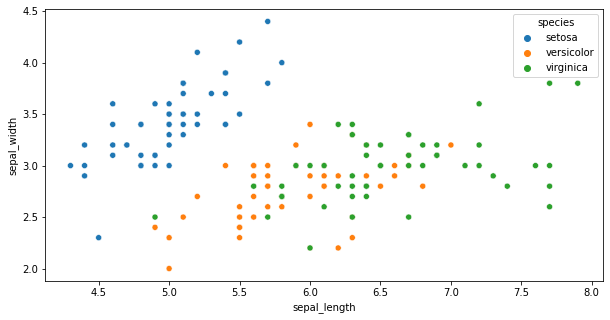

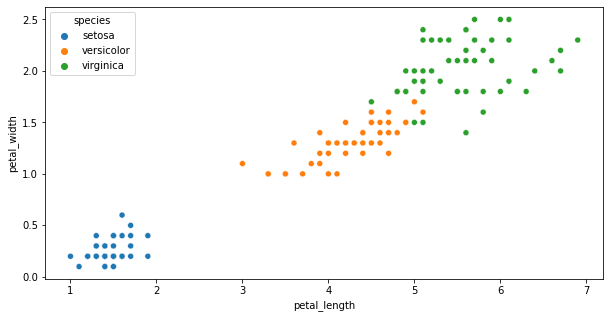

In [5]:
plt.figure(figsize = (10,5))
sn.scatterplot(x = "sepal_length", y = "sepal_width",data = iris, hue = "species")
plt.show()

plt.figure(figsize = (10,5))
sn.scatterplot(x = "petal_length", y = "petal_width",data = iris, hue = "species")
plt.show()

Text(0.5, 1.0, 'Decision region for the KNN algorithm')

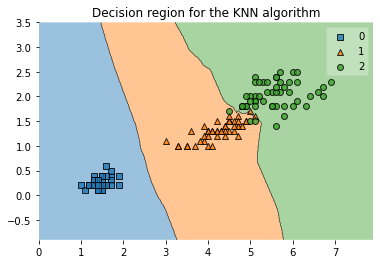

In [6]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from mlxtend.plotting import plot_decision_regions


X = iris[["petal_length","petal_width"]].values

y = iris["species"].astype("category").cat.codes.values
y = y.astype("int")

classifier = Knn(5)
classifier.fit(X, y)

plot_decision_regions(X = X, y= y, clf = classifier, legend = 1)
plt.title("Decision region for the KNN algorithm")

#### Lets see how the decision zone works when we change the *k* hyperparameter

C:\Users\gusta\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


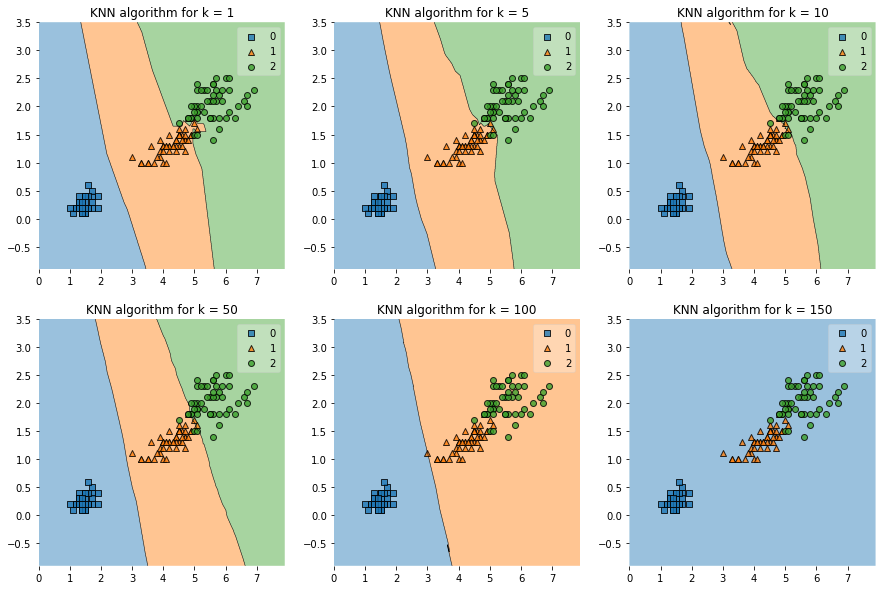

In [7]:
f, ax = plt.subplots(nrows = 2, ncols = 3, )
f.set_figwidth(15)
f.set_figheight(10)

k_values = [1,5,10,50,100,150]
cont = 0
for i in range(2):
    for j in range(3):
        k = k_values[cont]
        classifier = Knn(n_neighbors=k)
        classifier.fit(X, y)
                
        plot_decision_regions(X = X, y= y, clf = classifier, legend = 1, ax = ax[i,j])
        ax[i,j].set_title(f"KNN algorithm for k = {k}")
        cont = cont + 1
        


As I said before, the main idea of the algorithm is recognize new points based on the distance of the *training* points. In the plots from above we can see the **decision region** whichs explains where would land a new point, considering the position of the points.

So, as we iterate the **k** value (which indicate how many points should to be considered as that class) we see that for $k=1$, one point is more than enough to be part of that class. But as we walk through the amoun of points, we see that for $k=100$ we lost the green region because is absorve by the orange region. The same thing happend with the blue one.

Is recommended to use a value of k>1 because 1 makes the algorithm really slow, but not to large either because we can affect the decision region for some labels.

**observation**: in this case, *k* is what we call an **hyperparameter**, which is a value that makes part of the model structure, and whose function is to modelate the way our model learns.

In [10]:
#We generate an synthetic data to plot on the decision region

min_petal_length = iris["petal_length"].min()
max_petal_length = iris["petal_length"].max()

min_petal_width = iris["petal_width"].min()
max_petal_width = iris["petal_width"].max()

a1 = np.random.uniform(min_petal_length, max_petal_length,size=(5,1))
a2 = np.random.uniform(min_petal_width, max_petal_width, size = (5,1))

test = np.concatenate((a1,a2), axis = 1)


Text(0.5, 1.0, 'Where our new points land')

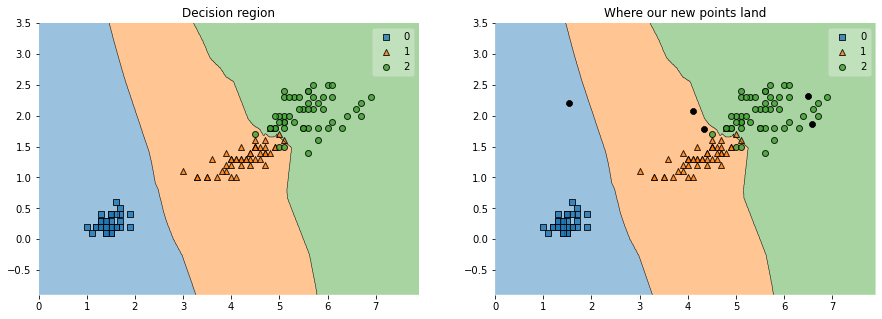

In [11]:
f,axx = plt.subplots(nrows=1, ncols = 2)
f.set_figwidth(15)
f.set_figheight(5)

classifier = Knn(5)
classifier.fit(X,y)

pred = classifier.predict(test)

plot_decision_regions(X,y, clf = classifier , ax = axx[0])
axx[0].set_title("Decision region")
plot_decision_regions(X,y, clf = classifier , ax = axx[1])
axx[1].scatter(test[:,0], test[:,1], marker= "8", c="black")
axx[1].set_title("Where our new points land")

### Setting the K parameter

As we mention before, K is an hyperparameter so tuning it would cause new results on our model. Lets see how affect the values of k in the accuracy of our model.

Tamaño del set input entrenamiento: (135, 2)
Tamaño del set output entrenamiento: (135,)
Tamaño del set input testeo: (15, 2)
Tamaño del set output testeo: (15,)


0.9333333333333333

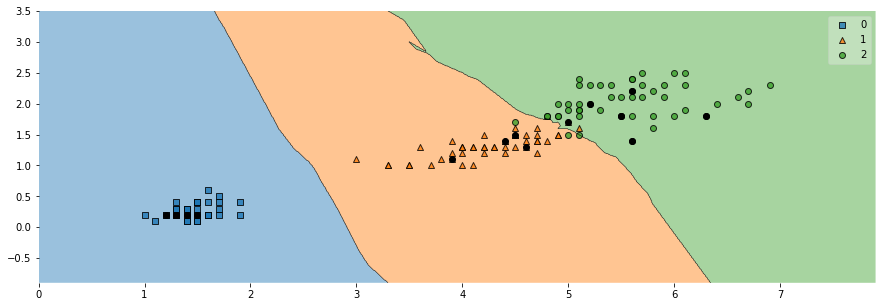

In [18]:
from sklearn.model_selection import train_test_split


#We split the data and stratify the output so we know that we have samples equally distribuited

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, stratify=y, random_state=42, shuffle = True)

for sets, name in zip([X_train, y_train, X_test, y_test], ["input entrenamiento", "output entrenamiento",
                                                          "input testeo","output testeo"]):
    print(f"Tamaño del set {name}: {sets.shape}")
    

model = Knn(10)
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

plt.figure(figsize = (15,5))
plot_decision_regions(X,y, clf = model,)
plt.scatter(X_test[:,0], X_test[:,1], c = "black" )


accuracy_score(model.predict(X_test), y_test)


In [19]:
df = pd.DataFrame({"y_real":y_test, "y_pred":model.predict(X_test)})
df

,y_real,y_pred
0,1,1
1,2,2
2,2,2
3,1,1
4,2,2
5,0,0
6,0,0
7,0,0
8,2,2
9,1,1


Text(0.5, 1.0, 'Accuracy for differents values of k')

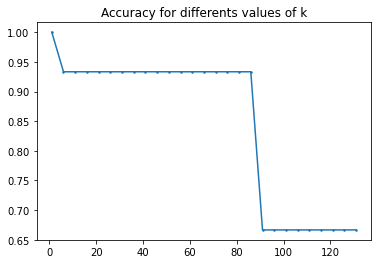

In [20]:
acc = []
size = len(X_train)
for k in np.arange(1,size, 5):
    clf = Knn(k)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    acc.append(accuracy)

plt.plot(np.arange(1,size,5),acc, "-o", markersize = 1.5)
plt.title("Accuracy for differents values of k")

See how different the accuracy is ? This is because k determines how many close point should be so the new point is considered in that label. If we put k = 1, we see that we max the accuracy. This is because it's enough to be close to one point to be considered as that point-class. Now we are modeling with 150 points, however in real life the situation is very different and KNN doesn't work this well. On th e other hand, if you choose k = 100, we drop the accuracy drastically because you are asking for 100 neighbors. In this case, that not make any sense because each class have 45 samples.

Mainly because the **curse of dimensionallity** where in higher dimensions, we lost the sense of distance and the data is not that interpretable by the model as we would like.


Hope you enjoyed the introduction of the main process to produce a model. Keep in mind that in real life the data is not easy to mange and the hyperparameter tunning is not that easy. But we the example above we see how the process is in the creation of a ML model.